
# Project: Investigate a Dataset The Movie

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#question">Question Researched</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a>
    <ul>
        <li><a href="#qs1">General Question</a></li>
        <li><a href="#qs2">Associate Question</a></li>
        <li><a href="#qs3">Trend Question</a></li>
    </ul>
</li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project I use Movie Data. This dataset contains information about 10,000 movies collected from The Movie Database (TMDb). Contains data such as title, cast, director, runtime, budget, revenue, release year etc.
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- The final two columns ending with “_adj" show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. <br>
<img src="image/information.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

<a id='question'></a>
## Research Question
Questions in the projects are as follows:

### Part 1: General
<ol>
    <li><a href="#gqs1">Which movie earns the highest and lowest profit?</a></li>
    <li><a href="#gqs2">Which movie have the highest and lowest revenue?</a></li>
    <li><a href="#gqs3">Which movie have the highest and lowest budget?</a></li>
    <li><a href="#gqs4">Which movie have the longest and shortest runtime?</a></li>
    <li><a href="#gqs5">How much movie released year by year?</a></li>
    <li><a href="#gqs6">How distribution of profit in different popularity levels in recent ten years?</a></li>
    <li><a href="#gqs7">How distribution of profit in different vote average levels in recent ten years?</a></li> 
</ol>

### Part 2: Find Associate Variable Movie Genre with Movie Metric
<ol>
    <li><a href="#2qs1">What movie genre that associated with high popularity?</a></li>
    <li><a href="#2qs2">What movie genre that associated with high revenue?</a></li>
    <li><a href="#2qs3">What movie genre that associated with high vote average?</a></li>
    <li><a href="#2qs4">What movie genre that associated with profit?</a></li>
</ol>

### Part 3: Find Some Trend
<ol>
    <li><a href="#3qs1">What is the trend of the genre every 10 years</a></li>
</ol>

<a id='wrangling'></a>
## Data Wrangling

> In this section I will load the data and print the example of data so I know the data sample value

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
%matplotlib inline

In [2]:
# Load data
df = pd.read_csv("tmdb-movies.csv")
# Print first row to see the example of data
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
# find shape of data
r,c = df.shape
print("Dataset Movie contains %d rows and %d columns" % (r,c))

Dataset Movie contains 10866 rows and 21 columns


### Data Cleaning
> In this section I will find column that unnecessary for this research, find duplicate data, find missing data, and change some format data that can make this research easier.

##### 1. Find Missing Value and Unnecessary Columns

In [4]:
# print the information about count of not null data value and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> From information above we know that column which missing values are:
1. imdb_id (object)
2. homepage (object)
3. tagline (object)
4. director (object)
5. overview (object)
6. keywords (object)
7. production_companies (object)
8. cast (object)
9. genres (object)

> I don't need some columns such as imdb_id, homepage,  tagline, and overview. So I will delete them. 

##### 1.1 Delete Unnecessary Columns

In [5]:
# list of unnecessary columns
col = ['imdb_id', 'homepage', 'tagline', 'overview']

# delete unnecessary columns
df.drop(col,axis=1,inplace=True)

In [6]:
# print statistical summary from numeric columns to find if any weird value
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> From summary above we found some weird data about budget, revenue, and runtime because the minimal value is zero. Lets output 1 sample of row that have zero number to check that is really zero or just another missing value.

In [7]:
# print sample that have budget zero to know is this real zero or not
df.query('budget == 0').head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07


> I found from google that Mr.Holmes budget is 10 million USD, so in that data I assumed <b> zero number is mean missing value.</b> Because of that I will change zero to NA so we can know there is some missing value from function 'info' <br>
<img src="image/budget.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

###### 1.2 Change Zero Value to NA

In [8]:
# change zero number to NA
zero_col = ['budget', 'revenue', 'runtime','budget_adj', 'revenue_adj']

# replace all zero value from to NAN in the list
df[zero_col] = df[zero_col].replace(0, np.NAN)

In [9]:
# see the update info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  5170 non-null float64
revenue                 4850 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10835 non-null float64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              5170 non-null float64
revenue_adj             4850 non-null float64
dtypes: float64(7), int64(3), object(7)
memory usage: 1.4+ MB


> From updated info we find some columns with small missing value (>= 95% from all row or >= 10322 data) they are <b> cast, director, runtime, and genres.</b> I choose 95% as threshold because I didn't want to delete too much data

###### 1.3 Remove Missing Value

In [10]:
# list the column that we want to remove missing value
col_mv = ['cast', 'director', 'runtime', 'genres']

# remove missing value
df.dropna(subset=col_mv, inplace=True)

# see the update information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10704 entries, 0 to 10865
Data columns (total 17 columns):
id                      10704 non-null int64
popularity              10704 non-null float64
budget                  5151 non-null float64
revenue                 4844 non-null float64
original_title          10704 non-null object
cast                    10704 non-null object
director                10704 non-null object
keywords                9294 non-null object
runtime                 10704 non-null float64
genres                  10704 non-null object
production_companies    9760 non-null object
release_date            10704 non-null object
vote_count              10704 non-null int64
vote_average            10704 non-null float64
release_year            10704 non-null int64
budget_adj              5151 non-null float64
revenue_adj             4844 non-null float64
dtypes: float64(7), int64(3), object(7)
memory usage: 1.5+ MB


#### 2. Drop Duplicated

In [11]:
# drop duplicate row in data
df.drop_duplicates(inplace=True)

# see the update info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 17 columns):
id                      10703 non-null int64
popularity              10703 non-null float64
budget                  5150 non-null float64
revenue                 4843 non-null float64
original_title          10703 non-null object
cast                    10703 non-null object
director                10703 non-null object
keywords                9293 non-null object
runtime                 10703 non-null float64
genres                  10703 non-null object
production_companies    9759 non-null object
release_date            10703 non-null object
vote_count              10703 non-null int64
vote_average            10703 non-null float64
release_year            10703 non-null int64
budget_adj              5150 non-null float64
revenue_adj             4843 non-null float64
dtypes: float64(7), int64(3), object(7)
memory usage: 1.5+ MB


##### 3. Change Data Type
> from the update info we can see that columns release_date have type as object, so I will change it in type date.

In [12]:
# change string to date format
df.release_date = pd.to_datetime(df['release_date'])

# see the update info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 17 columns):
id                      10703 non-null int64
popularity              10703 non-null float64
budget                  5150 non-null float64
revenue                 4843 non-null float64
original_title          10703 non-null object
cast                    10703 non-null object
director                10703 non-null object
keywords                9293 non-null object
runtime                 10703 non-null float64
genres                  10703 non-null object
production_companies    9759 non-null object
release_date            10703 non-null datetime64[ns]
vote_count              10703 non-null int64
vote_average            10703 non-null float64
release_year            10703 non-null int64
budget_adj              5150 non-null float64
revenue_adj             4843 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(3), object(6)
memory usage: 1.5+ MB


###### Clean Data Information

In [13]:
# the last data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 17 columns):
id                      10703 non-null int64
popularity              10703 non-null float64
budget                  5150 non-null float64
revenue                 4843 non-null float64
original_title          10703 non-null object
cast                    10703 non-null object
director                10703 non-null object
keywords                9293 non-null object
runtime                 10703 non-null float64
genres                  10703 non-null object
production_companies    9759 non-null object
release_date            10703 non-null datetime64[ns]
vote_count              10703 non-null int64
vote_average            10703 non-null float64
release_year            10703 non-null int64
budget_adj              5150 non-null float64
revenue_adj             4843 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(3), object(6)
memory usage: 1.5+ MB


In [14]:
# the last statistica summary from data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10703.000000,10703.000000,5.150000e+03,4.843000e+03,10703.000000,10703.000000,10703.000000,10703.000000,5.150000e+03,4.843000e+03
mean,64904.988321,0.653818,3.084401e+07,8.933981e+07,102.736896,220.333178,5.966112,2001.235355,3.701495e+07,1.152341e+08
std,91161.996308,1.005687,3.893782e+07,1.621546e+08,30.079331,579.481969,0.930155,12.825920,4.198674e+07,1.989424e+08
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10538.500000,0.211533,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000,8.210996e+06,1.048057e+07
50%,20235.000000,0.388036,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000,2.294283e+07,4.402879e+07
75%,73637.000000,0.722438,4.000000e+07,1.000000e+08,112.000000,149.000000,6.600000,2011.000000,5.024535e+07,1.317599e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

> in this section I will answer the question was declare in introduction

<b> I define some function that can help to answer the question <b>

list function name: <br>
<a id="as_currency">Function as_currency</a> <br>
<a id="get_movie_info">Function get_movie_info</a> <br>
<a id="get_hi_low">Function get_hi_low</a>

In [15]:
# change numeric format to dollar format
def as_currency(amount):
    if amount >= 0:
        return '${:,.2f}'.format(amount)
    else:
        return '-${:,.2f}'.format(-amount)

In [16]:
# get movie information
def get_movie_info(index, title):
    info = pd.DataFrame(df.loc[index])
    
    currency_col = ['budget','revenue','profit','budget_adj','revenue_adj','profit_adj']
    for idx in currency_col:
        info.loc[idx] = as_currency(info.loc[idx].item())
    
    info.columns = [title]
    return info

In [17]:
# get hihgest and lowes data information
def get_hi_low(column):
    # highest
    ## get the index value of the highest number
    highest_idx = df[column].idxmax(skipna=True)
    ## get data from index before
    title = "Highest " + column
    highest_data = get_movie_info(highest_idx,title)
    
    # lowest
    ## get the index value of the highest number
    lowest_idx = df[column].idxmin(skipna=True)
    ## get data from index before
    title = "Lowest " + column
    lowest_data = get_movie_info(lowest_idx,title)
    
    #concatenating two dataframes
    hi_low_data = pd.concat([highest_data, lowest_data], axis = 1)
    
    return hi_low_data

<a id='qs1'></a>
### General Question

<a id='gqs1'></a>
1. Which movie earns the highest and lowest profit?

In [18]:
# add column profit in data
df['profit'] = df['revenue']-df['budget']
df['profit_adj'] = df['revenue_adj']-df['budget_adj']

# previewing the changes in the dataset
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,1.254446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08,2.101614e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08,1.704191e+08


In [19]:
# check the update data, kolom profit and profit_adj will have na value because some revenue and budget is na
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 19 columns):
id                      10703 non-null int64
popularity              10703 non-null float64
budget                  5150 non-null float64
revenue                 4843 non-null float64
original_title          10703 non-null object
cast                    10703 non-null object
director                10703 non-null object
keywords                9293 non-null object
runtime                 10703 non-null float64
genres                  10703 non-null object
production_companies    9759 non-null object
release_date            10703 non-null datetime64[ns]
vote_count              10703 non-null int64
vote_average            10703 non-null float64
release_year            10703 non-null int64
budget_adj              5150 non-null float64
revenue_adj             4843 non-null float64
profit                  3849 non-null float64
profit_adj              3849 non-null float64
dtypes: dat

list used function: <br>
<a href='#get_hi_low'>Function get_hi_low</a> <br>

In [20]:
# Find highest and lowest profit
get_hi_low('profit')

,Highest profit,Lowest profit
id,19995,46528
popularity,9.43277,0.25054
budget,"$237,000,000.00","$425,000,000.00"
revenue,"$2,781,505,847.00","$11,087,569.00"
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


> from information above we know that the highest profit movie is <b>Avatar(2009)</b> which is \\$2,544,505,847 and the lowest profit is <b>The Warrior's Way(2010)</b> which is -\\$413,912,431.00, so that movie was loss money. <br>
> from the information movie we know that columns ending with “_adj" show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. So I also want to check the highest and lowest profit movie if we accounting for inflation over time

list used function: <br>
<a href='#get_hi_low'>Function get_hi_low</a> <br>

In [21]:
# Find highest and lowest profit_adj
get_hi_low('profit_adj')

,Highest profit_adj,Lowest profit_adj
id,11,46528
popularity,12.0379,0.25054
budget,"$11,000,000.00","$425,000,000.00"
revenue,"$775,398,007.00","$11,087,569.00"
original_title,Star Wars,The Warrior's Way
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,George Lucas,Sngmoo Lee
keywords,android|galaxy|hermit|death star|lightsaber,assassin|small town|revenge|deception|super speed
runtime,121,100
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


> from information above we know that the highest profit movie from all movie in our data is <b>Star Wars(1977)</b> which is \\$2,750,136,650.92 that is the highest profit if we accounting for inflation over time. The profit from Start Wars is \\$163,899,803.4 more than Avatar. <br>
> The lowest movie profit is still <b>The Warrior's Way(2010)</b> which is -\\$413,912,431.00

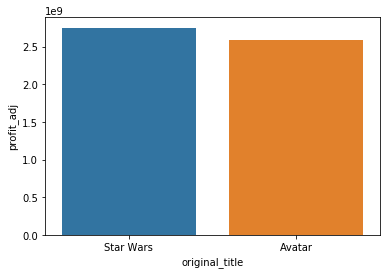

In [22]:
# visualize different profit_adj from Star Wars and Avatar
highest_profit = df[['original_title','profit_adj']].query("original_title in ['Star Wars','Avatar']")
sns.barplot(x="original_title", y="profit_adj", data=highest_profit)

###### Answer Question General 1

- The highest profit movie is Avatar(2009), but if we check the inflation over time so the highest profit move is Star Wars(1977) <br>
- The lowest profit movie is The Warrior's Way(2010)


<a href="#question">Go To List Question</a>

<a id='gqs2'></a>
2. Which movie have the highest and lowest revenue?

list used function: <br>
<a href='#get_hi_low'>Function get_hi_low</a> <br>

In [23]:
# Highest and lowest revenue
get_hi_low('revenue')

,Highest revenue,Lowest revenue
id,19995,13537
popularity,9.43277,0.462609
budget,"$237,000,000.00","$6,000,000.00"
revenue,"$2,781,505,847.00",$2.00
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
keywords,culture clash|future|space war|space colony|so...,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History


> from information above we know that the highest revenue movie is <b>Avatar(2009)</b> which is \\$2,781,505,847. 
> The lowest movie revenue is <b>Shattered Glass(2003)</b> which is \\$2

list used function: <br>
<a href='#get_hi_low'>Function get_hi_low</a> <br>

In [24]:
# Highest and lowest revenue_adj
get_hi_low('revenue_adj')

,Highest revenue_adj,Lowest revenue_adj
id,19995,13537
popularity,9.43277,0.462609
budget,"$237,000,000.00","$6,000,000.00"
revenue,"$2,781,505,847.00",$2.00
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
keywords,culture clash|future|space war|space colony|so...,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History


> from information above we know that the highest revenue movie from all movie in our data is <b>Avatar(2009)</b> which is \\$2,781,505,847 <br>
> The lowest movie revenue is still <b>Shattered Glass(2003)</b> which is -\\$2.37

###### Answer Question General 2

- The highest revenue movie is Avatar(2009)
- The lowest revenue movie is Shattered Glass(2003)

From answer question 1 we found that profit Avatar is lower than Star Wars so we can make conclusion that budget Star Wars is lower than Avatar because revenue Avatar is biger than Star Wars
     
<a href="#question">Go To List Question</a>

<a id='gqs3'></a>
3. Which movie have the highest and lowest budget?

list used function: <br>
<a href='#get_hi_low'>Function get_hi_low</a> <br>

In [25]:
# Highest and lowest budget
get_hi_low('budget')

,Highest budget,Lowest budget
id,46528,287524
popularity,0.25054,0.177102
budget,"$425,000,000.00",$1.00
revenue,"$11,087,569.00",-$nan
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror


> from information above we know that the highest budget movie is <b>The Warrior's Way(2010)</b> which is \\$425,000,000
> The lowest movie budget is <b>Fear Clinic(2014)</b> which is \\$1. <br>

list used function: <br>
<a href='#get_hi_low'>Function get_hi_low</a> <br>

In [26]:
# Highest and lowest budget_adj
get_hi_low('budget_adj')

,Highest budget_adj,Lowest budget_adj
id,46528,287524
popularity,0.25054,0.177102
budget,"$425,000,000.00",$1.00
revenue,"$11,087,569.00",-$nan
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror


> from information above we know that the highest budget_adj movie is <b>The Warrior's Way(2010)</b> which is \\$425,000,000
> The lowest movie budget_adj is <b>Fear Clinic(2014)</b> which is \\$1. <br>

###### Answer Question General 3

- The highest budget movie is The Warrior's Way(2010)
- The lowest budget movie is Fear Clinic(2014)
From answer question 1 we found that profit The Warrior's Way(2010) is lowest maybe because it is have a highest budget

<a href="#question">Go To List Question</a>

<a id='gqs4'></a>
4. Which movie have the longest and shortest runtime?

list used function: <br>
<a href='#get_hi_low'>Function get_hi_low</a> <br>

In [27]:
# Highest and lowest runtime
get_hi_low('runtime')

,Highest runtime,Lowest runtime
id,125336,264170
popularity,0.006925,0.202776
budget,-$nan,-$nan
revenue,-$nan,-$nan
original_title,The Story of Film: An Odyssey,Batman: Strange Days
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Kevin Conroy|Brian George|Tara Strong
director,Mark Cousins,Bruce Timm
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,dc comics|superhero|based on comic book|noir|p...
runtime,900,3
genres,Documentary,Action|Animation


###### Answer Question General 4

- The longest runtime movie is The Story of Film: An Odyssey(2011) that is 900 minutes
- The shortest runtime movie is Batman: Strange Days(2014) that is 3 minutes

<a href="#question">Go To List Question</a>

<a id='gqs5'></a>
5. How much movie released year by year?

In [28]:
# get number of movie group by release year
release = df.groupby('release_year').size()
# get index number of movie group by release year
release_idx = release.index

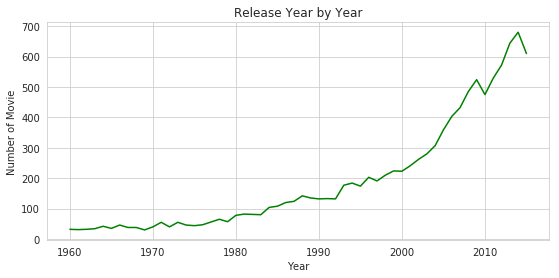

In [29]:
# visualisation
# set style
sns.set_style('whitegrid')
# set x, y axis data
x, y = release_idx, release
# set size
plt.figure(figsize=(9, 4))
# plot line chart for number of release
plt.plot(x, y, color = 'g', label = 'mean')
# set title and labels
plt.title('Release Year by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movie');

###### Answer Question General 5
from figure above we know that movie number always increassing every year, but in 2010 we have some slope.

<a href="#question">Go To List Question</a>

<a id='gqs6'></a>
6. How distribution of profit in different popularity levels in recent ten years?

> To help the next process, I will make some function

list function name: <br>
<a id="get_class">Function get_class</a> <br>
<a id="plot_by_year">Function plot_by_year</a> <br>

In [30]:
# make level from quantile to help categories column
def get_class(df, column):
    # find quantile to decide that class
    min_value = df[column].min()
    quantile_1 = df[column].describe()[4]
    quantile_2 = df[column].describe()[5]
    quantile_3 = df[column].describe()[6]
    max_value = df[column].max()
    
    # Bin edges that will be used to "cut" the data into groups
    bin_level = [ min_value, quantile_1, quantile_2, quantile_3, max_value]
    # Labels for the four budget level groups
    bin_name = [ 'Low', 'Medium', 'High', 'Very High'] 
    # Creates budget_levels column
    name = '{}_levels'.format(column)
    df[name] = pd.cut(df[column], bin_level, labels=bin_name, include_lowest = True)
    return df

In [31]:
# plot data group by year of year
def plot_by_year(df,column,object_column,dfyear):
    # Setting the positions and width for the bars
    pos = list(range(len(df.query('%s =="Low"' % column))))
    width = 0.2

    # Plotting the bars
    fig, ax = plt.subplots(figsize=(20,5))

    # Create a bar with Low data, in position pos,
    plt.bar(pos, 
            #using 'Low' data,
            df.query('%s =="Low"' % column)[object_column], 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color 
            color='#FFFF00', 
            # with label Low
            label= 'Low') 

    # Create a bar with Medium data, in position pos + some width buffer
    plt.bar([p + width for p in pos], 
            #using Medium data,
            df.query('%s =="Medium"'% column)[object_column],
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color 
            color='#FFD700', 
            # with label Medium
            label='Medium') 

    # Create a bar with High data, in position pos + some width buffer,
    plt.bar([p + width*2 for p in pos], 
            #using Moderately High data,
            df.query('%s =="High"' % column)[object_column], 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color 
            color='#ADFF2F', 
            # with label High
            label='High') 

    # Create a bar with Very High data,
    # in position pos + some width buffer,
    plt.bar([p + width*3 for p in pos], 
            #using High data,
            df.query('%s =="Very High"'% column)[object_column], 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#008000', 
            # with label High
            label='Very High')

    # Set the y axis label
    ax.set_ylabel(object_column)

    # Set the chart's title
    ax.set_title('%s in different %s levels in recent 10 years' % (object_column,column))

    # Set the position of the x ticks
    ax.set_xticks([p + 1.5 * width for p in pos])

    # Set the labels for the x ticks
    ax.set_xticklabels(dfyear)
    
    # Set the y ticks
    ax.set_ylim([min(df[object_column]),max(df[object_column])])

    # Adding the legend and showing the plot
    plt.legend( loc='upper left')
    plt.grid()
    plt.show()

> Lets find distribution of profit in different popularity levels in recent ten years

list used function: <br>
<a href=#get_class>Function get_class</a> <br>

In [32]:
# get popularity level
# choose the recent 10 years 
dfyear = np.sort(df.release_year.unique())[-10:]
# creat a empty df to assign df with popularity levels
df_popularity = pd.DataFrame()

#for each year, do the following procedure
for year in dfyear:
    df_temp = df.query('release_year == "%s"' % year).copy() # filter data with the selected year 
    df_temp = get_class(df_temp,'popularity') # get popularity level
    df_popularity = df_popularity.append(df_temp) # append to df_popularity
df_popularity.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,popularity_levels
6554,834,5.838503,50000000.0,1.113408e+08,Underworld: Evolution,Kate Beckinsale|Scott Speedman|Tony Curran|Sha...,Len Wiseman,budapest|key|light|werewolf|evolution,106.0,Fantasy|Action|Science Fiction|Thriller,Lakeshore Entertainment|Screen Gems,2006-01-12,1015,6.3,2006,5.408346e+07,1.204339e+08,61340801.0,6.635045e+07,Very High
6555,58,4.205992,200000000.0,1.065660e+09,Pirates of the Caribbean: Dead Man's Chest,Johnny Depp|Orlando Bloom|Keira Knightley|Bill...,Gore Verbinski,witch|fortune teller|bondage|exotic island|mon...,151.0,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2006-06-20,3181,6.8,2006,2.163338e+08,1.152691e+09,865659812.0,9.363575e+08,Very High
6556,920,3.941265,120000000.0,4.619831e+08,Cars,Owen Wilson|Paul Newman|Bonnie Hunt|Larry the ...,John Lasseter|Joe Ranft,car race|car journey|village and town|road|auto,117.0,Animation|Adventure|Comedy|Family,Walt Disney Pictures|Pixar Animation Studios,2006-06-08,2336,6.4,2006,1.298003e+08,4.997129e+08,341983149.0,3.699126e+08,Very High


In [33]:
# lets find statistic summary from popularity to know how the quantile cut the levels, and lets find statistical summary from profit
df_popularity.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
count,5354.000000,5354.000000,2.379000e+03,2.165000e+03,5354.000000,5354.000000,5354.000000,5354.000000,2.379000e+03,2.165000e+03,1.712000e+03,1.712000e+03
mean,113436.690325,0.713095,3.475924e+07,1.031749e+08,99.186029,268.594135,5.891688,2010.928838,3.421956e+07,1.010225e+08,8.334300e+07,8.133364e+07
std,107304.567574,1.219587,4.695805e+07,1.968944e+08,30.217657,681.641308,0.992524,2.831724,4.604534e+07,1.914991e+08,1.793768e+08,1.743710e+08
min,17.000000,0.000620,1.000000e+00,3.000000e+00,3.000000,10.000000,1.500000,2006.000000,9.210911e-01,3.038360e+00,-4.139124e+08,-4.139124e+08
25%,19715.750000,0.206118,6.000000e+06,3.338228e+06,89.000000,18.000000,5.300000,2009.000000,5.816388e+06,3.171821e+06,-2.220506e+06,-2.191682e+06
50%,71861.500000,0.390016,1.700000e+07,3.155486e+07,96.000000,42.000000,5.900000,2011.000000,1.682670e+07,3.038360e+07,2.152898e+07,2.145700e+07
75%,201730.750000,0.771668,4.000000e+07,1.075972e+08,108.000000,182.000000,6.600000,2013.000000,4.065602e+07,1.055790e+08,9.400637e+07,9.068777e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,2.586237e+09


In [34]:
# group the dataframe we created above with each popularity_levels in each year, find the profit_adj meadian
# I choose median because it not have effect from outlier data
df_popularity_by_year = df_popularity.groupby(['release_year','popularity_levels']).median()
df_popularity_by_year.head(8)

id  popularity      budget     revenue  \
release_year popularity_levels                                                
2006         Low                14872.0    0.113193   7000000.0   4687766.0   
             Medium             12225.0    0.297434   8500000.0  11290263.5   
             High                9806.5    0.546223  20000000.0  23629912.0   
             Very High           7551.0    1.182280  40000000.0  93161322.5   
2007         Low                15117.5    0.139703  10000000.0  10337477.0   
             Medium             13517.5    0.298249  10000000.0   3478080.0   
             High               10966.0    0.519439  19000000.0  22179430.0   
             Very High           4748.0    1.188489  47500000.0  95652995.5   

                                runtime  vote_count  vote_average  \
release_year popularity_levels                                      
2006         Low                   95.0        17.0          5.90   
             Medium                95.0        27.0          5.80   
             High                 100.0        72.5          5.90   
             Very High            106.0       306.0          6.30   
2007         Low                   93.5        16.0          5.85   
             Medium                96.0        26.0          5.80   
             High                  97.5        64.0          6.00   
             Very High            105.0       453.0          6.20   

                                  budget_adj   revenue_adj      profit  \
release_year popularity_levels                                           
2006         Low                7.571684e+06  5.070612e+06    166000.0   
             Medium             9.194188e+06  1.221233e+07   5796544.0   
             High               2.163338e+07  2.555975e+07   4910153.5   
             Very High          4.326677e+07  1.007697e+08  48197993.0   
2007         Low                1.051669e+07  1.087160e+07   1392364.0   
             Medium             1.051669e+07  3.657787e+06  -5349184.5   
             High               1.998170e+07  2.332541e+07   8511656.5   
             Very High          4.995426e+07  1.005953e+08  64373941.0   

                                  profit_adj  
release_year popularity_levels                
2006         Low                1.795571e+05  
             Medium             6.269943e+06  
             High               5.311162e+06  
             Very High          5.213428e+07  
2007         Low                1.464305e+06  
             Medium            -5.625569e+06  
             High               8.951442e+06  
             Very High          6.770005e+07

list used function: <br>
<a href=#plot_by_year>Function plot_by_year</a> <br>

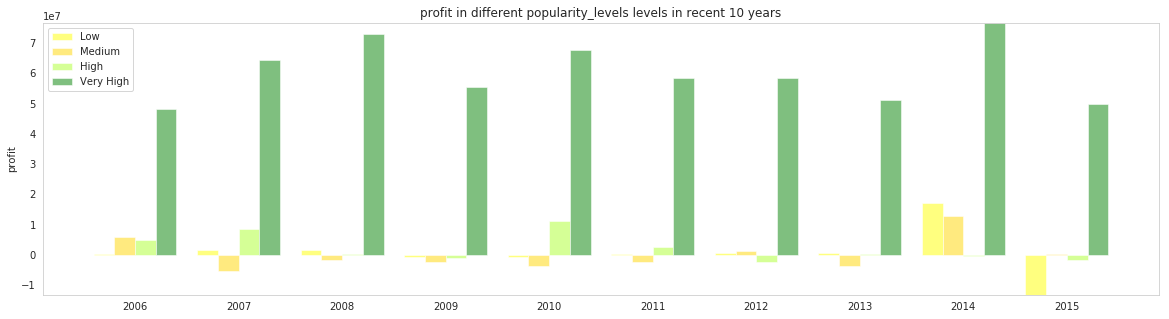

In [35]:
# visualitation
plot_by_year(df_popularity_by_year, 'popularity_levels', 'profit',dfyear)

###### Answer Question General 6
from figure above we found that the highest popularity didn't mean the highest profit, but for very high of popularity have highest profit. So keep the movie get very high popularity levels, with minimum popularity is 0.710151 to get high profit.

<a href="#question">Go To List Question</a>

<a id='gqs7'></a>
7. How distribution of profit in different vote average levels in recent ten years?

list used function: <br>
<a href=#get_class>Function get_class</a> <br>

In [36]:
# lets make rating level just like question before
# choose the recent 10 years 
dfyear = np.sort(df.release_year.unique())[-10:]
# creat a empty df to assign df with vote average levels
df_vote_average = pd.DataFrame()

#for each year, do the following procedure
for year in dfyear:
    df_temp = df.query('release_year == "%s"' % year).copy() # filter data with the selected year 
    df_temp = get_class(df_temp,'vote_average') # get vote average level
    df_vote_average = df_vote_average.append(df_temp) # append to df_popularity
df_vote_average.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,vote_average_levels
6554,834,5.838503,50000000.0,1.113408e+08,Underworld: Evolution,Kate Beckinsale|Scott Speedman|Tony Curran|Sha...,Len Wiseman,budapest|key|light|werewolf|evolution,106.0,Fantasy|Action|Science Fiction|Thriller,Lakeshore Entertainment|Screen Gems,2006-01-12,1015,6.3,2006,5.408346e+07,1.204339e+08,61340801.0,6.635045e+07,High
6555,58,4.205992,200000000.0,1.065660e+09,Pirates of the Caribbean: Dead Man's Chest,Johnny Depp|Orlando Bloom|Keira Knightley|Bill...,Gore Verbinski,witch|fortune teller|bondage|exotic island|mon...,151.0,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2006-06-20,3181,6.8,2006,2.163338e+08,1.152691e+09,865659812.0,9.363575e+08,Very High
6556,920,3.941265,120000000.0,4.619831e+08,Cars,Owen Wilson|Paul Newman|Bonnie Hunt|Larry the ...,John Lasseter|Joe Ranft,car race|car journey|village and town|road|auto,117.0,Animation|Adventure|Comedy|Family,Walt Disney Pictures|Pixar Animation Studios,2006-06-08,2336,6.4,2006,1.298003e+08,4.997129e+08,341983149.0,3.699126e+08,High


In [37]:
# lets find statistic summary from vote avg to know how the quantile cut the levels, and lets find statistical summary from profit
df_vote_average.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
count,5354.000000,5354.000000,2.379000e+03,2.165000e+03,5354.000000,5354.000000,5354.000000,5354.000000,2.379000e+03,2.165000e+03,1.712000e+03,1.712000e+03
mean,113436.690325,0.713095,3.475924e+07,1.031749e+08,99.186029,268.594135,5.891688,2010.928838,3.421956e+07,1.010225e+08,8.334300e+07,8.133364e+07
std,107304.567574,1.219587,4.695805e+07,1.968944e+08,30.217657,681.641308,0.992524,2.831724,4.604534e+07,1.914991e+08,1.793768e+08,1.743710e+08
min,17.000000,0.000620,1.000000e+00,3.000000e+00,3.000000,10.000000,1.500000,2006.000000,9.210911e-01,3.038360e+00,-4.139124e+08,-4.139124e+08
25%,19715.750000,0.206118,6.000000e+06,3.338228e+06,89.000000,18.000000,5.300000,2009.000000,5.816388e+06,3.171821e+06,-2.220506e+06,-2.191682e+06
50%,71861.500000,0.390016,1.700000e+07,3.155486e+07,96.000000,42.000000,5.900000,2011.000000,1.682670e+07,3.038360e+07,2.152898e+07,2.145700e+07
75%,201730.750000,0.771668,4.000000e+07,1.075972e+08,108.000000,182.000000,6.600000,2013.000000,4.065602e+07,1.055790e+08,9.400637e+07,9.068777e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09,2.586237e+09


list used function: <br>
<a href=#plot_by_year>Function plot_by_year</a> <br>

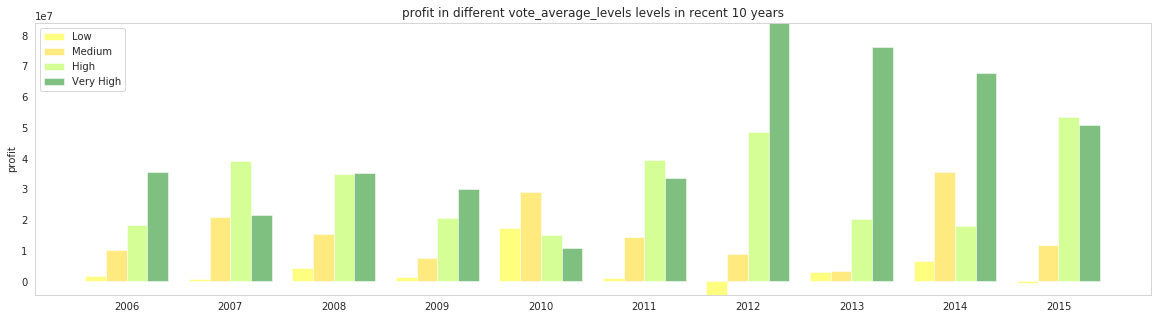

In [38]:
# group the dataframe we created above with each popularity_levels in each year, find the profit_adj meadian
# I choose median because it not have effect from outlier data
df_vote_average_by_year = df_vote_average.groupby(['release_year','vote_average_levels']).median()
# visualitation
plot_by_year(df_vote_average_by_year, 'vote_average_levels', 'profit',dfyear)

###### Answer Question General 7
from figure above we found that the highest level of vote average not always mean the movie get the highest profit,  especially to 2010 which medium vote have higher profit than high and very high vote average. 

<a href="#question">Go To List Question</a>

<a id='qs2'></a>
### Associated Question

<a id='2qs1'></a>
1. What genre that associated with high popularity?

> Because I want to check the associate of genre and genre are multiple value with delimiter | , so I decide to devide the column into single value in each row so it will be a binner data with their popularity level
> to make the process easy, I make some function

list function name: <br>
<a id="remove_punctuation">Function remove_punctuation</a> <br>
<a id="define_dict">Function define_dict</a> <br>
<a id="get_data_frame">Function get_data_frame</a> <br>

In [39]:
# remove punctuation, decimal, and space uneeded, so the string just containt character
def remove_punctuation(sentence, chars: list = ['[^\w\s]', '_', '\d', '\n', '\r']):
    sentence = sentence.strip()
    sentence = re.sub("|".join(chars), " ", sentence)
    sentence = sentence.replace(' +', ' ')

    return sentence

In [40]:
# define dictionary to help make dataframe with binner value, 
# the key of dictionary will save the column name, and the value will be number
def define_dict(columns):
    d = {}
    for c in columns:
        d[c] = 0
    return d

In [41]:
# make binner dataframe with column we needed
# metric are column level name
def get_data_frame(old_df,column,metric):
    names = set()
    r = old_df.shape[0] # nrow of data
    c = old_df.shape[1] # nrow of columns
    
    # get set of data to generate column
    for i in range(0,r):
        temp = str(old_df.iloc[i,old_df.columns.get_loc(column)]).split("|")
        for j in range(len(temp)):
            last_name = remove_punctuation(temp[j].lower()).split(" ")[-1]
            if last_name!='' and last_name!='nan':
                names.add(last_name)
                    
    df_temp = pd.DataFrame(columns = names) # empty data frame to save the final data
    
    for i in range(r):
        dict_column = define_dict(names) # dictionary with name as key and zero as value
        dict_column[metric] = old_df.iloc[i,old_df.columns.get_loc(metric)]
        temp = str(remove_punctuation(old_df.iloc[i,old_df.columns.get_loc(column)]).lower().split("|"))
        for name in names:
            dict_column[name] += temp.count(name)
        df_add = pd.DataFrame(dict_column, index=[0])
        df_temp = df_temp.append(df_add,ignore_index=True,sort=False) 
    
    return df_temp

In [42]:
# make dataframe 
df_genres = get_data_frame(df_popularity,'genres','popularity_levels')

In [43]:
# lets see the sample value of dataframe we make
df_genres.head(3)

,animation,war,horror,foreign,crime,drama,fantasy,adventure,action,history,...,western,family,mystery,documentary,thriller,movie,fiction,comedy,music,popularity_levels
0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,Very High
1,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,Very High
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,Very High


In [44]:
# lets find the sum in each column so we know what the genre most often used in all movies
df_genres.sum()

animation                                                          383
war                                                                106
horror                                                             884
foreign                                                             91
crime                                                              569
drama                                                             2291
fantasy                                                            398
adventure                                                          618
action                                                            1052
history                                                            141
romance                                                            747
western                                                             36
family                                                             519
mystery                                                            359
docume

In [45]:
# let's count the genre alomst use group by metric we decide before
df_genre_rank = df_genres.groupby(['popularity_levels']).sum()
df_genre_rank.head(8)

,animation,war,horror,foreign,crime,drama,fantasy,adventure,action,history,romance,western,family,mystery,documentary,thriller,movie,fiction,comedy,music
popularity_levels,,,,,,,,,,,,,,,,,,,,
High,107,27,216,10,154,643,96,139,263,39,192,11,138,76,39,411,25,114,422,44
Low,49,19,257,60,84,508,52,84,151,29,171,4,90,75,229,266,36,105,437,69
Medium,90,29,280,20,123,591,79,117,249,40,174,7,100,89,91,375,32,148,389,48
Very High,137,31,131,1,208,549,171,278,389,33,210,14,191,119,4,430,2,182,442,34


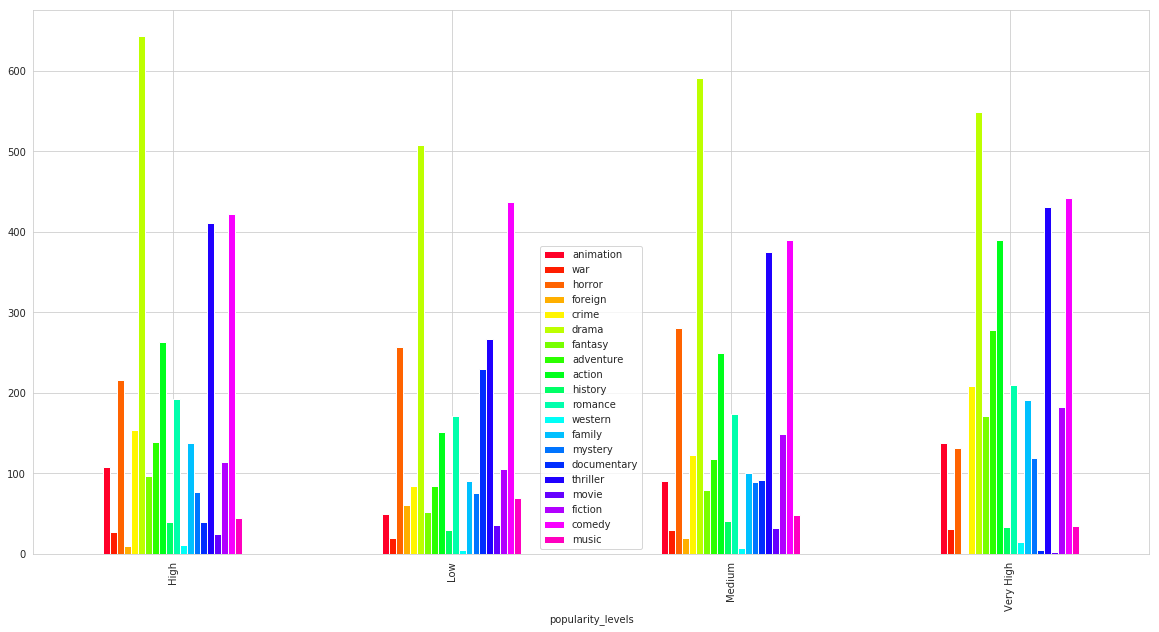

In [46]:
# plot sum of genre use in each level of popularity
df_genre_rank.plot(kind='bar',figsize=(20,10),colormap='gist_rainbow');

###### Answer Question Associate 1
> from figure above we found that genre drama are high distributed in all popularity level <br>
> movie which level "very high" popularity in genre movie, documentary, and foreign has the smallest amount. This means that not many movies have high popularity in that genres <br>
<a href="#question">Go To List Question</a>

<a id='2qs2'></a>
2. What movie genre that associated with high revenue?

> This calculation just like the answer before, so lets make function to make it simple and reusable

list used function: <br>
<a href='#get_class'>Function get_class</a> <br>
<a href='#get_data_frame'>Function get_data_frame</a> <br> <br>
list function name: <br>
<a id='get_df_rank'>Function get_df_rank</a>

In [47]:
def get_df_rank(df,column,metric):
    # make dataframe 
    df_new = df.copy()
    df_new = get_class(df_new,metric)
    metric_name = '{}_levels'.format(metric)
    df_genre_new = get_data_frame(df_new.copy(),column,metric_name)

    # let's count the genre alomst use group by metric we decide before
    df_genre_new_rank = df_genre_new.groupby([metric_name]).sum()
    df_genre_new_rank.head(8)
    
    return df_genre_new_rank

In [48]:
# lets call the function to get the df we want
df_genre_revenue_rank = get_df_rank(df,'genres','revenue_adj')
df_genre_revenue_rank.head(8)

,animation,war,horror,foreign,crime,drama,fantasy,adventure,action,history,romance,western,family,mystery,documentary,thriller,movie,fiction,comedy,music
revenue_adj_levels,,,,,,,,,,,,,,,,,,,,
High,43,25,155,1,214,541,118,205,311,47,209,13,146,102,6,358,1,141,480,42
Low,33,23,166,18,160,693,56,86,201,26,230,10,44,91,74,324,0,117,411,56
Medium,35,37,161,11,214,603,93,151,280,42,243,23,101,119,16,382,0,116,446,43
Very High,126,52,79,0,185,434,194,401,468,38,194,19,222,98,1,358,0,212,433,43


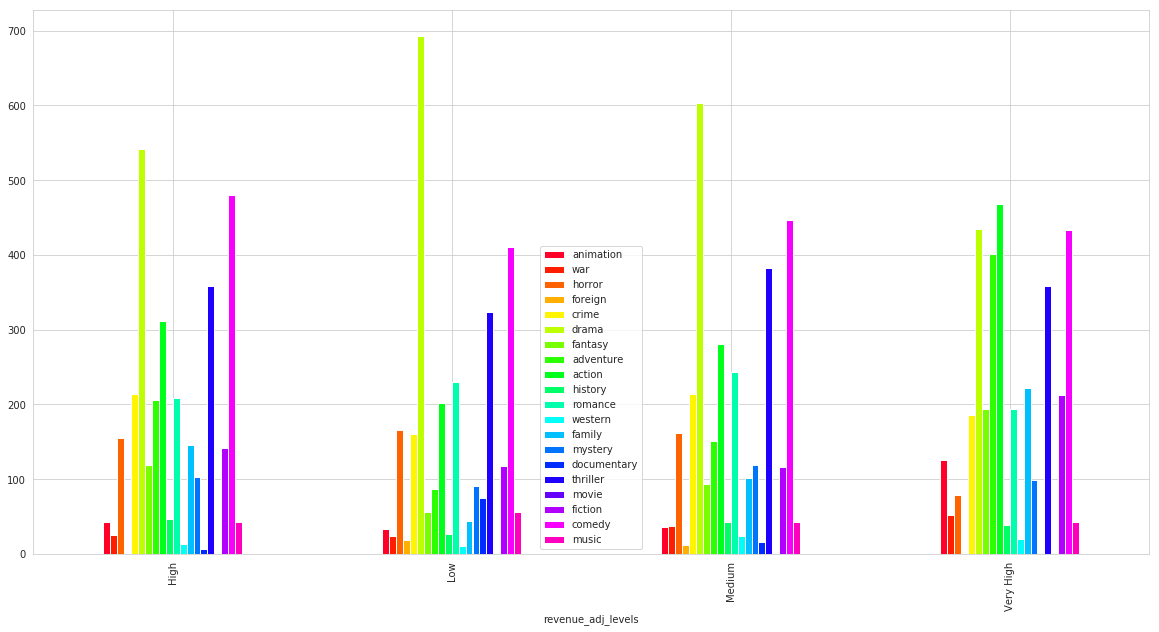

In [49]:
# plot sum of genre use in each level of revenue
df_genre_revenue_rank.plot(kind='bar',figsize=(20,10),colormap='gist_rainbow');

###### Answer Question Associate 2
> from figure above we found that even always in all level o fpopularity (answer question associate 1) but in revenue genre that always appear in high distribution is horor. <br>
> In very high revenue, genre documentary and foreign is not appear (or maybe too small) so its mean they dont have a big revenue.<br>
> also in high level revenue, genre foreign is not appear but genre documentary is appear with small distribution.<br>
<a href="#question">Go To List Question</a>

<a id='2qs3'></a>
3. What movie genre that associated with high vote average?

list used function: <br>
<a href='get_df_rank'>Function get_df_rank</a>

In [50]:
# lets call the function to get the df we want
df_genre_vote_rank = get_df_rank(df,'genres','vote_average')
df_genre_vote_rank.head(8)

,animation,war,horror,foreign,crime,drama,fantasy,adventure,action,history,romance,western,family,mystery,documentary,thriller,movie,fiction,comedy,music
vote_average_levels,,,,,,,,,,,,,,,,,,,,
High,204,75,257,47,398,1381,220,384,595,104,534,45,332,233,86,719,31,276,1001,115
Low,67,37,849,54,249,833,275,393,765,28,354,35,311,199,18,980,54,471,1070,48
Medium,149,65,401,37,364,1170,239,373,622,71,463,38,308,223,47,787,47,277,1020,68
Very High,244,91,121,45,341,1354,173,314,392,127,352,46,261,151,316,414,27,196,674,163


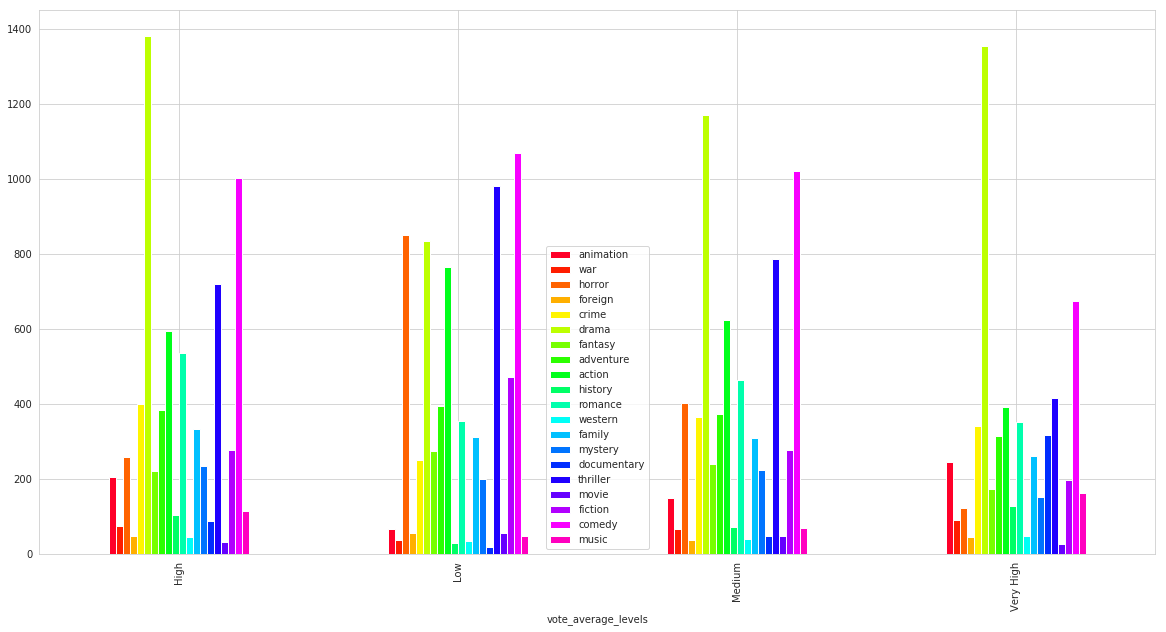

In [51]:
# plot sum of genre use in each level of vote
df_genre_vote_rank.plot(kind='bar',figsize=(20,10),colormap='gist_rainbow');

###### Answer Question Associate 3
> from figure above we found that just like popularity level, in vote level drama still appear in all distribution. All genre drama have higher distribution except in low level. So its mean more drama movie have high vote. <br>
> Just like popularity and revenue, comedy is in second place distribution in each vote level.<br>
<a href="#question">Go To List Question</a>

<a id='2qs4'></a>
4. What movie genre that associated with high profit?

list used function: <br>
<a href='get_df_rank'>Function get_df_rank</a>

In [52]:
# lets call the function to get the df we want
df_genre_profit_rank = get_df_rank(df,'genres','profit_adj')
df_genre_profit_rank.head(8)

,animation,war,horror,foreign,crime,drama,fantasy,adventure,action,history,romance,western,family,mystery,documentary,thriller,movie,fiction,comedy,music
profit_adj_levels,,,,,,,,,,,,,,,,,,,,
High,33,30,152,1,170,414,83,162,246,39,163,11,99,85,7,302,1,112,351,25
Low,36,30,94,8,175,523,96,165,278,34,172,18,81,111,3,337,0,127,307,36
Medium,26,23,148,3,166,485,64,108,197,31,178,10,66,71,20,284,0,113,362,34
Very High,106,36,69,0,140,331,153,314,364,25,153,13,179,77,1,280,0,167,337,39


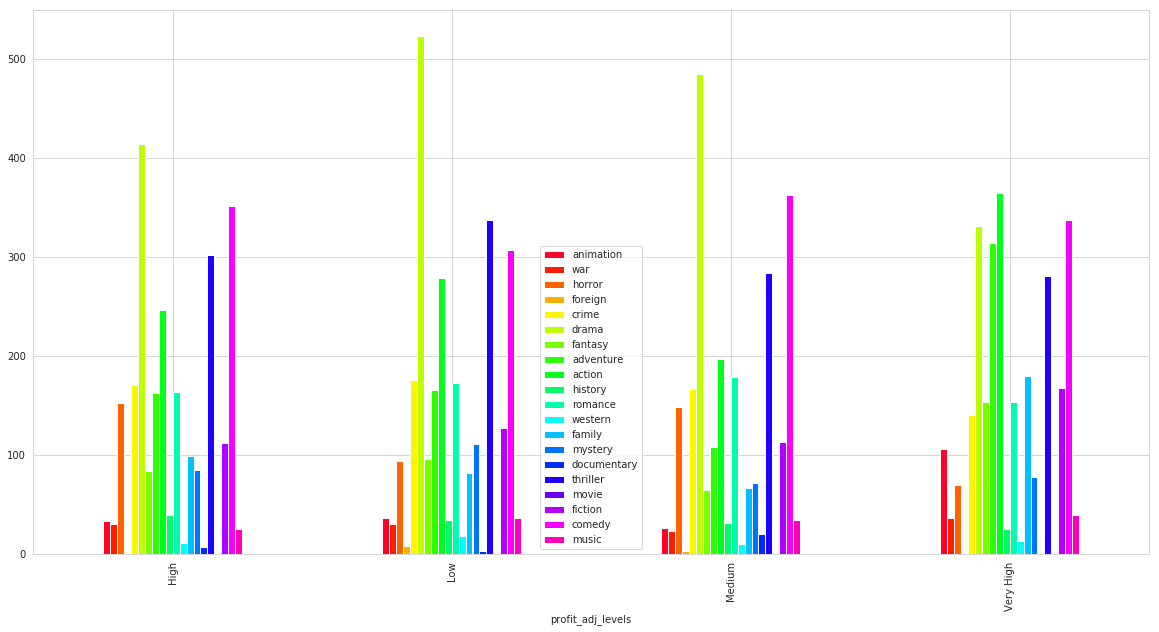

In [53]:
# plot sum of genre use in each level of vote
df_genre_profit_rank.plot(kind='bar',figsize=(20,10),colormap='gist_rainbow');

###### Answer Question Associate 4
> from figure above we found that just like the answer before, in profit level drama still appear in all distribution. All genre drama have higher distribution except in very high level. So its mean drama movie have good distribution in all profit level. <br>
> Genre action have highest distribution in very high profit level, in another level that genre just in 4 positition from higher distribution.<br>
<a href="#question">Go To List Question</a>

<a id='qs3'></a>
### Trend Question

<a id='3qs1'></a>
1. What is the trend of the genre every 10 years

In [54]:
# sort the movie release year list.
df_sub_year= df.release_year.unique()
df_sub_year= np.sort(df_sub_year)
df_sub_year

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

In [55]:
# year list of 1960s
y1960s =df_sub_year[:10]
# year list of 1970s
y1970s =df_sub_year[10:20]
# year list of 1980s
y1980s =df_sub_year[20:30]
# year list of 1990s
y1990s = df_sub_year[30:40]
# year list of afer 2000
y2000s = df_sub_year[40:50]
# year list of afer 2000
y2010 = df_sub_year[50:]

In [56]:
# year list devide by 10 years
times = [y1960s, y1970s, y1980s, y1990s, y2000s, y2010]
# timesline name
names = ['1960s', '1970s', '1980s', '1990s', '2000s','after2010']
df['decade'] = np.nan
for i in range(len(names)):
    index = df[df.release_year.isin(times[i])].index.values.tolist()
    for j in index:
        df.loc[j,'decade'] = names[i]
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,decade
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,1.254446e+09,after2010
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08,2.101614e+08,after2010
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08,1.704191e+08,after2010
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09,1.718723e+09,after2010
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09,1.210949e+09,after2010


list used function: <br>
<a href=#get_data_frame>Function get_data_frame</a>

In [57]:
df_genre_decade = get_data_frame(df.copy(),'genres','decade')
# let's count the genre alomst use group by metric we decide before
df_genre_decade_rank = df_genre_decade.groupby(['decade']).sum()
df_genre_decade_rank.head(8)

,animation,war,horror,foreign,crime,drama,fantasy,adventure,action,history,romance,western,family,mystery,documentary,thriller,movie,fiction,comedy,music
decade,,,,,,,,,,,,,,,,,,,,
1960s,14,31,47,9,43,167,23,64,78,31,67,36,39,32,2,64,2,34,112,20
1970s,17,25,104,3,83,238,30,77,121,23,51,36,38,56,13,148,8,77,121,25
1980s,32,32,221,8,153,421,122,174,271,32,175,13,101,72,12,260,9,172,428,51
1990s,78,29,189,32,270,862,188,275,455,53,341,25,272,148,21,495,19,211,736,49
2000s,285,87,483,99,466,1605,318,505,776,113,632,26,463,281,135,972,52,367,1346,114
after2010,238,64,584,32,337,1445,226,369,673,78,437,28,299,217,284,961,69,359,1022,135


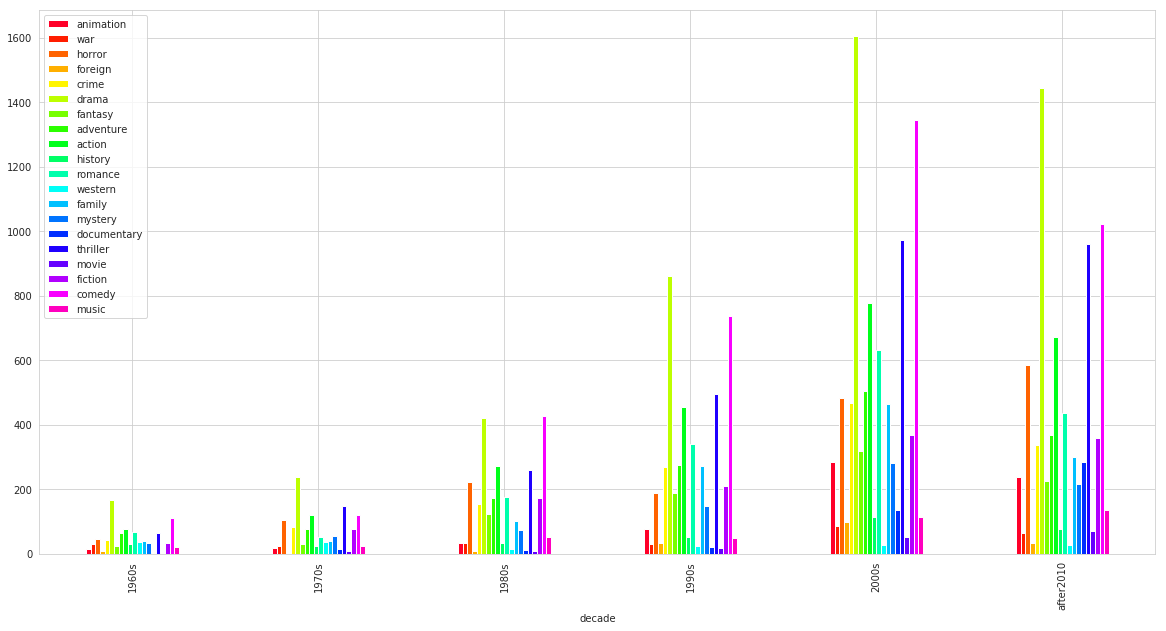

In [58]:
# plot sum of genre use in each decade
df_genre_decade_rank.plot(kind='bar',figsize=(20,10),colormap='gist_rainbow');

###### Answer Question Trend 
> from figure above we found that drama genre always have high distribution in every decade, genre western getting smaller in every decade. <br>
> Genre foreign always have low distribution in every decade.<br>
<a href="#question">Go To List Question</a>

<a id='conclusions'></a>
## Conclusions

The purpose of this research is to answer 3 parts of the question: 

<b> Part 1: General </b> <br>
From this part we found that number of movie increasing every year. Movie with the highest profit is Avatar(2009), but if we check the inflation over time so the highest profit movie is Star Wars(1977) and the lowest profit movie is The Warrior's Way(2010). The Warrior's Way maybe get the lowest profit because it is movie with the highest budget. The lowest budget movie so far is Fear Clinic(2014). In this data we found the highest revenue movie is Avatar(2009), maybe it is reason that movie become the highest profit, but because the highest profit by inflation is Star Wars so we can conclude that budget Star Wars is bigger than Avatar (of course we assumed with inflation). The lowest revenue movie is Shattered Glass(2003).
The longest runtime movie is The Story of Film: An Odyssey(2011) that is 900 minutes, its is make sense because it is documantary movie. The shortest runtime movie is Batman: Strange Days(2014) that is just run in 3 minutes.
The highest popularity didn't mean the highest profit, but for level "very high" in popularity have highest profit. So if we want to make a highest profit movie we must make the movie get very high popularity levels, with minimum popularity is 0.710151. 
We also found that the highest level of vote average not always mean the movie get the highest profit, especially to 2010 which medium vote have higher profit than high and very high vote average.

<b> Part 2: Find Associate Variable Movie Genre with Movie Metric </b><br>
From this part we found that genre drama are high distributed in all popularity level. Movies with genre "documentary", "movie", or "foreign" only few get "very high" popularity level. In revenue level, genre that always appear in high distribution is horor. 
In level very high revenue, genre documentary and foreign is not appear (or maybe too small) so its mean they don't have a big revenue. Also in high level revenue, genre foreign is not appear but genre documentary is appear with small distribution. In vote level, drama still appear in all distribution and have higher distribution except in low level vote. So its mean many drama movie have high vote. Just like popularity and revenue, comedy is in second place distribution in each vote level. In profit level, genre drama still appear in all distribution and also have higher distribution except in very high profit level. So its mean drama movie have good distribution in all profit level. Genre action have highest distribution in very high profit level, in another level that genre just in 4th positition from higher distribution.

<b> Part 3: Find Some Trend </b>
From this part we found that drama genre always have high distribution in every decade, genre western getting smaller in every decade. Genre foreign always have low distribution in every decade.